In [1]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml(data_id=40996)

In [2]:
fashion_mnist['data'].shape

(70000, 784)

In [3]:
fashion_mnist['DESCR']

"**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  Pullover  \

In [4]:
help(''.rsplit)

Help on built-in function rsplit:

rsplit(...) method of builtins.str instance
    S.rsplit(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string, starting at the end of the string and
    working to the front.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified, any whitespace string
    is a separator.



In [5]:
c = '0  T-shirt/top  \n1  Trouser  \n2  Pullover  \n3  Dress  \n4  Coat  \n5  Sandal  \n6  Shirt  \n7  Sneaker  \n8  Bag  \n9  Ankle boot'

fashion_label_translation = {
    int(k): v for k, v in [
        item.split(maxsplit=1) for item in c.split('\n')
    ]
}

fashion_label_translation


{0: 'T-shirt/top  ',
 1: 'Trouser  ',
 2: 'Pullover  ',
 3: 'Dress  ',
 4: 'Coat  ',
 5: 'Sandal  ',
 6: 'Shirt  ',
 7: 'Sneaker  ',
 8: 'Bag  ',
 9: 'Ankle boot'}

In [6]:
fashion_label_high_lebel_translation = {
    0: 'Apparel',
    1: 'Apparel',
    2: 'Apparel',
    3: 'Apparel',
    4: 'Apparel',
    5: 'Footwear',
    6: 'Apparel',
    7: 'Footwear',
    8: 'Accessory',
    9: 'Footwear',
}

In [7]:
def translate_label(y, translation=fashion_label_translation):
    return pd.Series(y).apply(
        lambda y: translation[int(y)]
    ).values

# Display Fashion Data

In [9]:
fashion_mnist['data'][0].shape

(784,)

In [10]:
from matplotlib.colors import ListedColormap

def display_fashion(img, target, ax):
    
    if len(img.shape) < 2:
        w = np.sqrt(img.shape[0]).astype(int)
        img = img.reshape((w, w))
    
    ax.imshow(img, cmap='Greys')
    ax.set_title(f'{target}')
    ax.grid(False)

In [11]:
from sklearn.model_selection import train_test_split

fashion_mnist_sample = {}

fashion_mnist_sample['data'], _, fashion_mnist_sample['target'], _ = train_test_split(
    fashion_mnist['data'], fashion_mnist['target'], train_size=10000
)

x, y = fashion_mnist_sample['data'], fashion_mnist_sample['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
# translation = fashion_label_high_lebel_translation
translation = fashion_label_translation

y_train_translated = translate_label(y_train, translation=translation)
y_test_translated = translate_label(y_test, translation=translation)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train_translated)
y_test_encoded = le.transform(y_test_translated)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


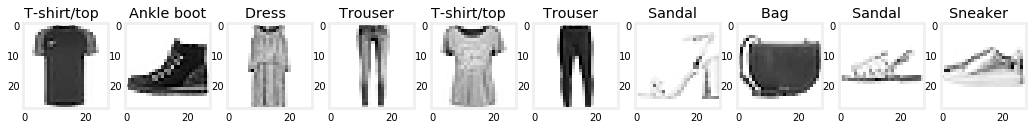

In [15]:
fig, axs = plt.subplots(1, 10, figsize=(16, 12))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[i])

fig.show()

# Kernels

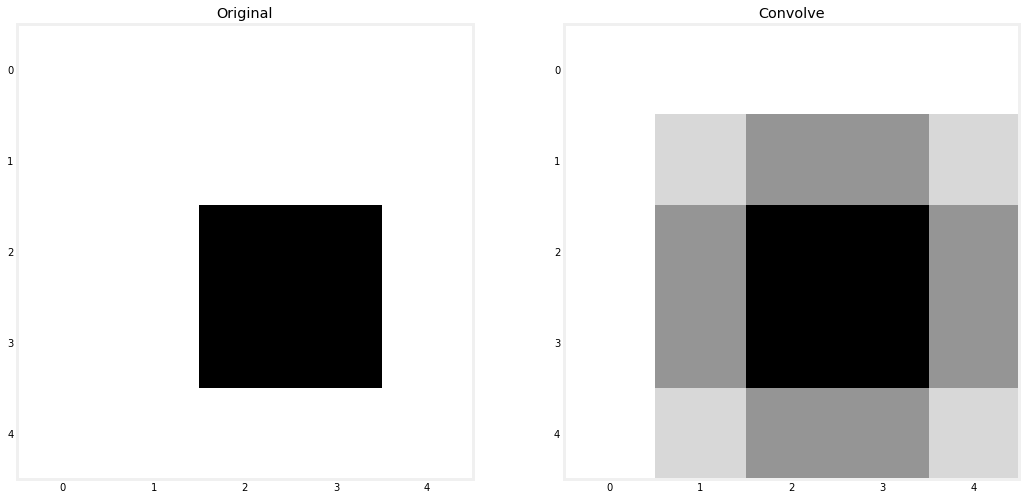

In [16]:
from scipy import ndimage

x_example = [
    [0,0,0,0,0], [0,0,0,0,0], [0,0,1,1,0], [0,0,1,1,0], [0,0,0,0,0],
]
x_example = np.array(x_example)

fig, axs = plt.subplots(1, 2, figsize=(16, 9))

axs[0].imshow(x_example.reshape((5, 5)), cmap='Greys')
axs[0].set_title('Original')
axs[0].set_yticks(range(5))
axs[0].set_xticks(range(5))
axs[0].grid(False)

kernel = [[1,1,1],[1,1,1],[1,1,1]] 
x_example_convolve =  ndimage.convolve(x_example, kernel, mode='constant', cval=0)
x_example_convolve = x_example_convolve / 9

axs[1].imshow(x_example_convolve.reshape((5, 5)), cmap='Greys')
axs[1].set_title('Convolve')
axs[1].set_yticks(range(5))
axs[1].set_xticks(range(5))
axs[1].grid(False)

In [17]:
x_example

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [18]:
x_example_convolve.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.11, 0.22, 0.22, 0.11],
       [0.  , 0.22, 0.44, 0.44, 0.22],
       [0.  , 0.22, 0.44, 0.44, 0.22],
       [0.  , 0.11, 0.22, 0.22, 0.11]])

## Create Convolve Function

In [20]:
from scipy import ndimage
from sklearn.preprocessing import MinMaxScaler

def convolve(x, kernel=[[0,-1,0], [-1,5,-1], [0,-1,0]]):
    w = int(np.sqrt(x.shape[1]))
    x = ndimage.convolve(x.reshape((x.shape[0], w, w)), [kernel], mode='constant', cval=0.0) 
    x = x.reshape(x.shape[0], x.shape[1]*x.shape[2]) 
    x = MinMaxScaler().fit_transform(x)

    return x

In [21]:
kernels = [
    ('Sharpen', [[0,-1,0], [-1,5,-1], [0,-1,0]]),
    ('V-Edge', [[-1,0,1], [-2,0,2], [-1,0,1]]),
    ('H-Edge', [[-1,-2,-1], [0,0,0], [1,2,1]]),
]

In [22]:
[-1, -1, 0], [-1,0,1], [0,1,1]

([-1, -1, 0], [-1, 0, 1], [0, 1, 1])

In [23]:
kernels = [
    ['Sharpen', [[0,-1,0], [-1,5,-1], [0,-1,0]], None, None],
    ['V-Edge', [[-1,0,1], [-2,0,2], [-1,0,1]], None, None],
    ['H-Edge', [[-1,-2,-1], [0,0,0], [1,2,1]], None, None],
]

for i, kernel in enumerate(kernels):
    kernels[i][-2] = convolve(x_train, kernel[1])
    kernels[i][-1] = convolve(x_test, kernel[1]) 
    
    
x_train_conv = convolve(x_train, kernels[-1][1])
x_test_conv = convolve(x_test, kernels[-1][1])

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


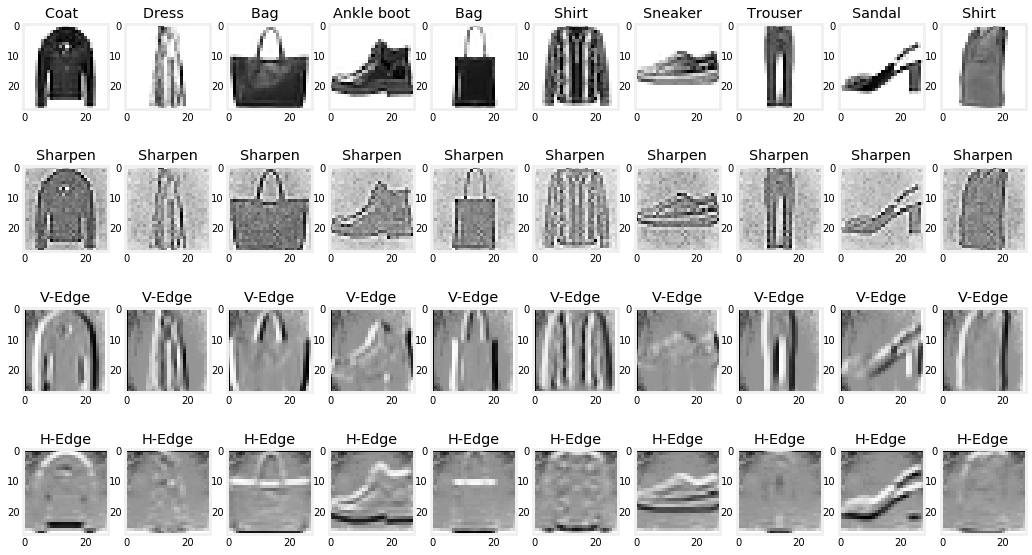

In [24]:
fig, axs = plt.subplots(4, 10, figsize=(16, 10))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[0][i])
    display_fashion(kernels[0][2][rand], kernels[0][0], axs[1][i])
    display_fashion(kernels[1][2][rand], kernels[1][0], axs[2][i])
    display_fashion(kernels[2][2][rand], kernels[2][0], axs[3][i])

fig.show()

## Add Max Pooling Function

In [26]:
from scipy import ndimage
from sklearn.preprocessing import MinMaxScaler
from skimage.measure import block_reduce

def maxpool(x, size=(2,2)):
    w = int(np.sqrt(x.shape[1]))
    # x = ndimage.maximum_filter(x.reshape((x.shape[0], w, w)), size=(x.shape[0], size[0], size[1])) 
    x = np.array([block_reduce(img.reshape((w, w)), block_size=(size[0], size[1]), func=np.max) for img in x])
    x = x.reshape(x.shape[0], x.shape[1]*x.shape[2]) 
    x = MinMaxScaler().fit_transform(x)

    return x

In [27]:
x_train_maxpool = maxpool(x_train_conv, size=(5,5))
x_test_maxpool = maxpool(x_test_conv, size=(5,5)) 

print(np.sqrt(x_test_conv.shape[1]), np.sqrt(x_test_maxpool.shape[1]))

28.0 6.0


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


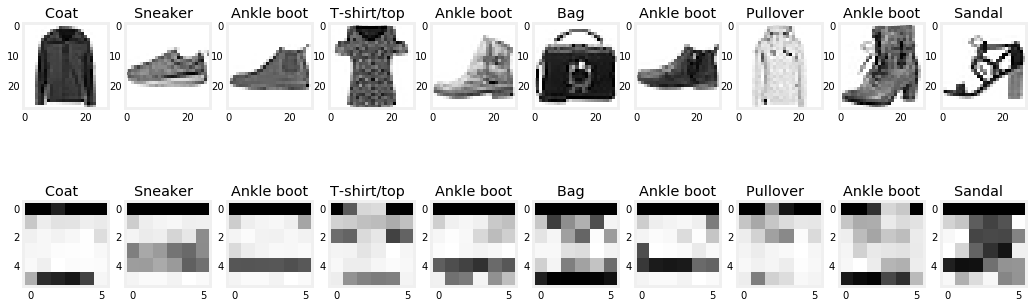

In [29]:
fig, axs = plt.subplots(2, 10, figsize=(16, 6))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[0][i])
    display_fashion(x_train_maxpool[rand], y_train_translated[rand], axs[1][i])

fig.show()

In [30]:
class ConvolutionTransformer:
    
    def __init__(self, kernel=[], max_pool=False, max_pool_size=(2,2)):
        self.kernel = kernel
        self.max_pool = max_pool
        self.max_pool_size = max_pool_size
        
    def fit(self, x):
        return x
    
    def transform(self, x, y=None):
        x = convolve(x, self.kernel)
        if self.max_pool:
            x = maxpool(x, self.max_pool_size)
        return x
    
    def fit_transform(self, x, y=None):
        x = self.fit(x)
        return self.transform(x)

In [31]:
from sklearn.pipeline import FeatureUnion

funion = FeatureUnion(
    [
        (kernel[0], ConvolutionTransformer(kernel=kernel[1], max_pool=False))
        for kernel in kernels
    ]
)

x_train_convs = funion.fit_transform(x_train)
x_test_convs = funion.fit_transform(x_test)

print(f'Shape {x_train.shape[-1]} => {x_train_convs.shape[-1]}')

Shape 784 => 2352


In [32]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(1000, 500, 100),
    activation='relu',
    learning_rate_init=0.01,
    solver='adam',
    max_iter=80,
    batch_size=50,
    early_stopping=True,
)

mlp.fit(x_train_convs, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=50, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1000, 500, 100), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=80, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
y_test_predict = mlp.predict(x_test_convs)

In [34]:
from sklearn.metrics import precision_recall_fscore_support

micro_fscore = precision_recall_fscore_support(y_test, y_test_predict, average='micro')[2]
print(f'Micro FScore = {micro_fscore}')

p, r, f, s = precision_recall_fscore_support(y_test, y_test_predict)

pd.DataFrame(
    {
        'Precision': p,
        'Recall': r,
        'F': f,
        'Support': s,
    },
    index=le.classes_.tolist()
).round(2).style.bar(subset=['Precision', 'Recall', 'F'], align='mid', color='#CCCCCC')

Micro FScore = 0.099


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Precision,Recall,F,Support
Ankle boot,0,0,0,189
Bag,0,0,0,173
Coat,0,0,0,187
Dress,0,0,0,207
Pullover,0.1,1,0.18,198
Sandal,0,0,0,213
Shirt,0,0,0,177
Sneaker,0,0,0,222
T-shirt/top,0,0,0,211
Trouser,0,0,0,223


In [35]:
from sklearn.pipeline import FeatureUnion

funion = FeatureUnion(
    [
        (kernel[0], ConvolutionTransformer(kernel=kernel[1], max_pool=True, max_pool_size=(4,4)))
        for kernel in kernels
    ]
)

x_train_convs = funion.fit_transform(x_train)
x_test_convs = funion.fit_transform(x_test)

print(f'Shape {x_train.shape[-1]} => {x_train_convs.shape[-1]}')

Shape 784 => 147


In [36]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(500, 300),
    activation='relu',
    learning_rate_init=0.01,
    solver='adam',
    max_iter=80,
    batch_size=50,
    early_stopping=True,
)

mlp.fit(x_train_convs, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=50, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(500, 300), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=80, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [37]:
y_test_predict = mlp.predict(x_test_convs)

In [38]:
from sklearn.metrics import precision_recall_fscore_support

micro_fscore = precision_recall_fscore_support(y_test, y_test_predict, average='micro')[2]
print(f'Micro FScore = {micro_fscore}')

p, r, f, s = precision_recall_fscore_support(y_test, y_test_predict)

pd.DataFrame(
    {
        'Precision': p,
        'Recall': r,
        'F': f,
        'Support': s,
    },
    index=le.classes_.tolist()
).round(2).style.bar(subset=['Precision', 'Recall', 'F'], align='mid', color='#CCCCCC')

Micro FScore = 0.81


,Precision,Recall,F,Support
Ankle boot,0.7,0.86,0.77,189
Bag,0.99,0.91,0.95,173
Coat,0.91,0.53,0.67,187
Dress,0.86,0.83,0.84,207
Pullover,0.73,0.74,0.74,198
Sandal,0.99,0.73,0.84,213
Shirt,0.55,0.58,0.56,177
Sneaker,0.8,0.95,0.87,222
T-shirt/top,0.78,0.95,0.86,211
Trouser,0.91,0.95,0.93,223


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100, 50), (100, 100), (500, 100), (500, 100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.01, 0.001],
    'solver': ['sgd', 'adam'],
}

gs = GridSearchCV(
    estimator=MLPClassifier(
        max_iter=50,
        batch_size=50,
        early_stopping=True,
    ), 
    param_grid=param_grid,
    cv=4,
    verbose=2,
    n_jobs=-1
)
 
gs.fit(x_train_convs, y_train)


Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 29.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size=50, beta_1=0.9, beta_2=0.999,
                                     early_stopping=True, epsilon=1e-08,
                                     hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=50, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None,...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer

In [40]:
gs.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [41]:
y_test_predict = gs.predict(x_test_convs)

In [42]:
from sklearn.metrics import precision_recall_fscore_support

micro_fscore = precision_recall_fscore_support(y_test, y_test_predict, average='micro')[2]
print(f'Micro FScore = {micro_fscore}')

p, r, f, s = precision_recall_fscore_support(y_test, y_test_predict)

pd.DataFrame(
    {
        'Precision': p,
        'Recall': r,
        'F': f,
        'Support': s,
    },
    index =le.classes_.tolist()
).round(2).style.bar(subset=['Precision', 'Recall', 'F'], align='mid', color='#CCCCCC')

Micro FScore = 0.815


,Precision,Recall,F,Support
Ankle boot,0.84,0.73,0.78,189
Bag,0.98,0.93,0.95,173
Coat,0.87,0.55,0.67,187
Dress,0.89,0.76,0.82,207
Pullover,0.74,0.73,0.73,198
Sandal,0.85,0.95,0.9,213
Shirt,0.47,0.73,0.58,177
Sneaker,0.92,0.86,0.89,222
T-shirt/top,0.83,0.93,0.88,211
Trouser,0.93,0.92,0.92,223
